# DecMegBrain with McFly tool

En este Notebook aplicamos una herramienta llamada **McFly**. Mcfly, implementa el desarrollo de las **DeepConvLSTM** que fueron desarrrolladas en un principio en Theano. Al estar deprecado, se intentó aplicar a Keras, sin embargo, algunas de las fases de esta implementación no eran posibles en este framework y por ello, nace Mcfly. 

![texto alternativo](https://mcfly.readthedocs.io/en/latest/_static/mcflylogo.png)



[Fuente artículo DeepConvLSTM](https://www.mdpi.com/1424-8220/16/1/115/htm)

[Repositorio original implementación en Theano](https://github.com/sussexwearlab/DeepConvLSTM/blob/master/DeepConvLSTM.ipynb)



Esta herramienta no sólo aplica **DeepConvLSTM** sino que también crea modelos aleatorios tanto de **CNNs** como de **LSTM**  y además, permite la visualización y búsqueda de mejores parámetros y el mejor modelo de los propuestos aleatoriamente según el número de modelos que definamos manualmente. 


![Imagen genérica DeepConvLSTM](https://www.mdpi.com/sensors/sensors-16-00115/article_deploy/html/images/sensors-16-00115-g003.png)


Los layers 6 y 7 corresponderían a redes LSTM.



**BASE DE DATOS UTILIZADA:**

Según las bases de datos creadas tras los distintos preprocesados, hemos utilizado el preprocesado que elimina los valores: ... 
reduciendo de (9414, 306, 375) a  (6024, 126, 31).

**CAMBIOS EN EL DATA SET:**

La herramienta implementa redes con un loss: **categorical_crossentropy** por lo que tuvimos que realizar algunos cambios en y_train porque recibía las etiquetas como categoricas y discretizadas con one-hot.

* Librería: sklearn.preprocessing import LabelEncoder


**PARÁMETROS:**
Utilizamos los mejores parámetros obtenidos en el mejor entrenamiento con LSTM:

* Epochs:7
* Sigmoid en la última capa, dado que por defecto usaba softmax y en nuestro caso tenemos una clasficiación binaria
* Batch_set: todas las imagenes


**CAMBIOS EN LA HERRAMIENTA PARA NUESTRO CASO:**

Tuvimos que entrar en los ficheros y modificar:
*  modelgen.py 
* find_architecture.py 

**Entornos** (ambos explicados)

* Local
* Google Colaboratory

En el caso de Google Colaboratory seguir los pasos de creación oficiales y subir a Drive la carpeta llamada 'env_mcfly' del repositorio.



[mcfly installation page](https://github.com/NLeSC/mcfly)







## Import required Python modules

In [1]:
import sys
import os
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing#integer to categorical
##one hot encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt

!pip install -q mcfly

# mcfly
from mcfly import modelgen, find_architecture, storage
from keras.models import load_model
from keras.utils import np_utils
np.random.seed(2)

##Drive imports

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
import glob




Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##**Necesitamos modificar los archivos modelgen.py y find_architecture.py tal y como se comentó en la introducción** 
*  En el caso de estar en local únicamente.

*  En el caso de usar Google Colaboratory hay que seguir estos pasos cargando modelgen.py y find_architecture.py modificados desde local a la máquina virtual de google.





**Importante: Los cambios de las librerías en la máquina virtual se eliminan al terminar la sesión**


##Modificando McFly en Local



1.   Accedemos a la ubicación de Mcfly en este caso dado que en local usamos un entorno virtual de Anaconda: **home/user_name/anaconda3/lib/python3.6/site-packages/mcfly**
2.   Modificamos:

     * modelgen.py 
       * Reemplazamos ''softmax' por 'sigmoid' lineas 201 y 266
     
     * find_architecture.py 
      *  Reemplazamos nr_epochs=5 por nr_epochs=7 lineas 41 y 168
      *  Reemplazamos batch_size=20 por batch_size=100 linea 43





## Modificando McFly en Google Colaboratory:






**¿Dónde está instalado McFly en la MV?**

In [0]:
import mcfly
mcfly

<module 'mcfly' from '/usr/local/lib/python3.6/dist-packages/mcfly/__init__.py'>

* Accedemos a la ruta en Google Colaboratory
  * Menú desplegable de la izquierda
![texto alternativo](https://i.stack.imgur.com/3r3Ou.png)

  * Accedemos a la ruta de mcfly 
  * Comprobamos que los dos archivos tengan los cambios

* Abrimos modelgen.py y find_architecture.py siguiendo los pasos que aparecen en las imágenes a continuación para comprobar que estén modificados correctamente. ***Parece ser que coge los cambios en local directamente***



In [0]:
cd /usr/local/lib/python3.6/dist-packages/mcfly/

/usr/local/lib/python3.6/dist-packages/mcfly


In [0]:
!ls -a

.   find_architecture.py  modelgen.py  storage.py
..  __init__.py		  __pycache__  _version.py


##**Definición del entorno donde se extraerán los datos**

##Local

In [0]:
sys.path.insert(0, os.path.abspath('../..'))
directory_to_extract_to = '/home/isa/Escritorio/Universidad/master/ML/PROYECTO/env_mcfly'

##Google Colaboratory

In [0]:


sys.path.insert(0, os.path.abspath('../..'))
directory_to_extract_to =glob.glob('/content/drive/My Drive/Colab NoteBooks/env_mcfly')




#**HANDS ON LAB!**

![texto alternativo](https://i1.wp.com/npptraining.com/wp-content/uploads/2018/06/handonlab.png?fit=205%2C221&ssl=1)

#PREPARACIÓN DE LOS DATOS

## Importación de datos ya preprocesados

Esta implementación se hace directamente con los datos del cuarto preprocesamiento: por lo que nos ahorramos los pasos hechos en otros notebooks y cargamos los datos directamente.

***Nota: para agilizar el proceso, se cargan los datos directamente ya divididos en train,test y val. Descomentar para poder generarlos y guardarlos***

** CARGA DE DATOS DESDE LOCAL **

In [0]:
y_train = np.load("y_train.npy")
X_train = np.load("X_train.npy")

**CARGA DE DATOS GOOGLE COLABORATORY **


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/env_mcfly"

modelcomparison.json  X_train.npy	 y_train_binary_2.npy
X_test.npy	      X_val.npy		 y_train.npy
X_train_2.npy	      y_test_binary.npy  y_val_binary.npy


In [0]:
y_train = np.load("/content/drive/My Drive/Colab Notebooks/env_mcfly/y_train.npy")
X_train = np.load("/content/drive/My Drive/Colab Notebooks/env_mcfly/X_train.npy")

print(y_train)

#(y_train.dtype)
print(y_train.shape)
print(X_train.shape)



[0 0 1 ... 1 0 0]
(9414,)
(9414, 126, 31)


##División del Dataset en Train, Test y Val (descomentar en el caso de no tenerlo)

In [0]:
'''

X_train_1, X_test, y_train_binary, y_test_binary = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train_2, X_val, y_train_binary_2, y_val_binary = train_test_split(X_train_1, y_train_binary, test_size=0.2, random_state=1)
'''

###Guardar los conjuntos de Train, Test y Val (descomentar en el caso de no tenerlo)

**Local**


In [0]:
''''
np.save("y_train_binary_2.npy",y_train_binary_2) #debe tener y_train_binary_2 (6024,)
np.save("y_val_binary.npy",y_val_binary)#debe tener y_val_binary (1507,)
np.save("X_train_2.npy",X_train_2)#(6024, 306, 375)
np.save("X_test.npy",X_test)
np.save("y_test_binary.npy",y_test_binary)#debe tener y_test_binary (1883,)
np.save("X_val.npy",X_val)
'''

**Google Colaboratory**

In [0]:
'''

#np.save('y_train_binary.npy',y_train_binary) #debe tener y_train_binary (9414,)
np.save("/content/drive/My Drive/Colab Notebooks/env_mcfly/y_train_binary_2.npy",y_train_binary_2) #debe tener y_train_binary_2 (6024,)
np.save("/content/drive/My Drive/Colab Notebooks/env_mcfly/y_val_binary.npy",y_val_binary)#debe tener y_val_binary (1507,)
np.save("/content/drive/My Drive/Colab Notebooks/env_mcfly/X_train_2.npy",X_train_2)#(6024, 306, 375)
np.save("/content/drive/My Drive/Colab Notebooks/env_mcfly/X_test.npy",X_test)
np.save("/content/drive/My Drive/Colab Notebooks/env_mcfly/y_test_binary.npy",y_test_binary)#debe tener y_test_binary (1883,)
np.save("/content/drive/My Drive/Colab Notebooks/env_mcfly/X_val.npy",X_val)
'''

###Cargamos los conjuntos de Train, Test y Val 

**Local**

In [0]:
y_train_binary_2= np.load("y_train_binary_2.npy")
y_test_binary= np.load("y_test_binary.npy")
y_val_binary= np.load("y_val_binary.npy")



X_train_2= np.load("X_train_2.npy")
X_test= np.load("X_test.npy")
X_val= np.load("X_val.npy")

**Google Colaboratory**

In [0]:


y_train_binary_2= np.load("/content/drive/My Drive/Colab Notebooks/env_mcfly/y_train_binary_2.npy")
y_test_binary= np.load("/content/drive/My Drive/Colab Notebooks/env_mcfly/y_test_binary.npy")
y_val_binary= np.load("/content/drive/My Drive/Colab Notebooks/env_mcfly/y_val_binary.npy")



X_train_2= np.load("/content/drive/My Drive/Colab Notebooks/env_mcfly/X_train_2.npy")
X_test= np.load("/content/drive/My Drive/Colab Notebooks/env_mcfly/X_test.npy")
X_val= np.load("/content/drive/My Drive/Colab Notebooks/env_mcfly/X_val.npy")


###Imprimimos la apariencia de los conjuntos

In [0]:

print('x train tras test y val  shape:', X_train_2.shape)
print('x  test  shape:', X_test.shape)
print('x  val  shape:', X_val.shape)



#print('y train primitiva shape:', y_train.shape)
print('y train tras test y val shape:', y_train_binary_2.shape)
print('y  val shape:', y_val_binary.shape)
#print('y train tras test shape:', y_train_binary.shape)
print('y test shape:', y_test_binary.shape)

x train tras test y val  shape: (6024, 126, 31)
x  test  shape: (1883, 126, 31)
x  val  shape: (1507, 126, 31)
y train tras test y val shape: (6024,)
y  val shape: (1507,)
y test shape: (1883,)


## Mofidificaciones en los conjuntos para trabajar con McFly

**McFly ** trabaja con los datos **X** y las etiquetas **y** como de tipo array **Numpy**. 

* La forma de X se expresa como una tupla de Python que contiene: 
  * El número de muestras, la longitud de la serie de tiempo y el número de canales para cada muestra. 
* La forma de y representa el número de muestras y el número de clases (etiquetas únicas). 

En **McFly** **y** tiene el formato **one-hot-encoding**, lo que supone que en la creación de la red neuronal utiliza un loss tipo **categorical_lossentropy**, por lo que y tuvo un cambio de formato de :

**(numero de muestras, )** ---> **(numero de muestras, número de clases)**

Para ello utilizamos las liberías **Sklearn.preprocessing** y **Keras.utils**


###**ONE-HOT-ENCODING**

In [4]:
'''
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
'''
encoder = LabelEncoder()
encoder.fit(y_train_binary_2)
encoded_Y = encoder.transform(y_train_binary_2)
# convert integers to dummy variables (i.e. one hot encoded)
y_train_binary_2 = np_utils.to_categorical(encoded_Y)

encoderT = LabelEncoder()
encoderT.fit(y_test_binary)
encoded_Y_test = encoderT.transform(y_test_binary)
# convert integers to dummy variables (i.e. one hot encoded)
y_test_binary = np_utils.to_categorical(encoded_Y_test)


encoderV = LabelEncoder()
encoderV.fit(y_val_binary)
encoded_Y_val = encoderV.transform(y_val_binary)
# convert integers to dummy variables (i.e. one hot encoded)
y_val_binary = np_utils.to_categorical(encoded_Y_val)



print(y_train_binary_2.shape)
print(y_test_binary.shape)
print(y_val_binary.shape)


(6024, 2)
(1883, 2)
(1507, 2)


In [0]:
print('x train shape:', X_train_2.shape)
print('x val shape:', X_val.shape)
print('x test shape:', X_test.shape)
print('y val shape :', y_val_binary.shape)
print('y train shape:', y_train_binary_2.shape)
print('y test shape:', y_test_binary.shape)

x train shape: (6024, 126, 31)
x val shape: (1507, 126, 31)
x test shape: (1883, 126, 31)
y val shape : (1507, 2)
y train shape: (6024, 2)
y test shape: (1883, 2)


The data is split between train test and validation.

In [0]:
print('train set size:', X_train.shape[0])
print('validation set size:', X_val.shape[0])
#print('test set size:', X_test.shape[0])
print('train label set size:', y_train_binary_2.shape[1])
print('test label set size:', y_test_binary.shape[1])
print('validation label set size:', y_val_binary.shape[1])



train set size: 9414
validation set size: 1507
train label set size: 2
test label set size: 2
validation label set size: 2


#DEEP LEARNING 
![texto alternativo](https://jardindeideas.net/wp-content/uploads/2016/04/simulacion-estructura-red-neuronal.jpg)

## GENERACIÓN DE MODELOS DE ENTRENAMIENTO CON MCFLY

McFly mediante la funcion generate_models genera modelos random con parámetros variables entre sí. En este caso, hemos elegido que genere solamente dos modelos debido a que tardan mucho tiempo. 

In [0]:
num_classes = y_train_binary_2.shape[1]

models = modelgen.generate_models(X_train_2.shape,
                                  number_of_classes=num_classes,
                                  number_of_models = 2)

modelgen.generate_models

<function mcfly.modelgen.generate_models>

In [0]:
print(num_classes)

2


In [0]:
cuando num of models=2 y son 2 CNN no he podido pillar los parametos 
Epoch 7/7
6024/6024 [==============================] - 111s 18ms/step - loss: 0.4425 - acc: 0.9192 - val_loss: 0.8391 - val_acc: 0.6861


##¿QUÉ MODELOS SE HAN GENERADO?
* CNN
* DEEPCONVLSTM

In [0]:
models_to_print = range(len(models))
for i, item in enumerate(models):
    if i in models_to_print:
        model, params, model_types = item
        print("-------------------------------------------------------------------------------------------------------")
        print("Model " + str(i))
        print(" ")
        print("Hyperparameters:")
        print(params)
        print(" ")
        print("Model description:")
        model.summary()
        print(" ")
        print("Model type:")
        print(model_types)
        print(" ")

-------------------------------------------------------------------------------------------------------
Model 0
 
Hyperparameters:
{'learning_rate': 0.08360289270402858, 'regularization_rate': 0.0022439468517196116, 'filters': array([85, 17, 44]), 'fc_hidden_nodes': 443}
 
Model description:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc (None, 126, 31)           124       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 126, 85)           7990      
_________________________________________________________________
batch_normalization_12 (Batc (None, 126, 85)           340       
_________________________________________________________________
activation_11 (Activation)   (None, 126, 85)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 126, 17)   




## COMPARACIÓN DE MODELOS


**Local**

In [0]:
resultpath = os.path.join(directory_to_extract_to, '/home/isa/Escritorio/Universidad/master/ML/PROYECTO/env_mcfly/mcfly-tutorial/ML/models')
if not os.path.exists(resultpath):
        os.makedirs(resultpath)

**Google Colaboratory**

In [0]:
# Define directory where the results, e.g. json file, will be stored

resultpath = "/content/drive/My Drive/Colab Notebooks/env_mcfly/";
if not os.path.exists("/content/drive/My Drive/Colab Notebooks/env_mcfly/"):
        os.makedirs(directory_to_extract_to)

## Entrenamiento de todo el conjunto de Train y Val para elegir qué modelo es mejor para nuestro caso

In [0]:
outputfile = os.path.join(resultpath, 'modelcomparison.json')

histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train_2,y_train_binary_2,
                                                                           X_val, y_val_binary,
                                                                           models,nr_epochs=7,
                                                                           subset_size=6024,
                                                                           verbose=True,batch_size=10,
                                                                           outputfile=outputfile)
print('Details of the training process were stored in ',outputfile)

Training model 0 CNN
Train on 6024 samples, validate on 1507 samples
Epoch 1/7
6024/6024 [==============================] - 46s 8ms/step - loss: 1.0556 - acc: 0.5078 - val_loss: 1.6583 - val_acc: 0.4930
Epoch 2/7
6024/6024 [==============================] - 46s 8ms/step - loss: 0.9816 - acc: 0.5090 - val_loss: 2.8506 - val_acc: 0.4983
Epoch 3/7
6024/6024 [==============================] - 46s 8ms/step - loss: 1.0451 - acc: 0.4930 - val_loss: 0.8140 - val_acc: 0.5123
Epoch 4/7
6024/6024 [==============================] - 46s 8ms/step - loss: 0.9202 - acc: 0.5098 - val_loss: 0.8477 - val_acc: 0.4983
Epoch 5/7
6024/6024 [==============================] - 46s 8ms/step - loss: 0.9656 - acc: 0.5312 - val_loss: 3.4344 - val_acc: 0.4983
Epoch 6/7
6024/6024 [==============================] - 46s 8ms/step - loss: 1.0090 - acc: 0.5118 - val_loss: 1.1810 - val_acc: 0.4983
Epoch 7/7
6024/6024 [==============================] - 46s 8ms/step - loss: 0.9967 - acc: 0.5125 - val_loss: 1.0237 - val_acc: 

## Guardamos las imágenes de los modelos

In [0]:
from keras.utils.vis_utils import plot_model
outputfile_plots = os.path.join("/content/drive/My Drive/Colab Notebooks/env_mcfly/", model_types+'.png')

models_to_print = range(len(models))
for i, item in enumerate(models):
    if i in models_to_print:
        model, params, model_types = item        
        plot_model(model, to_file=outputfile_plots, show_shapes=True, show_layer_names=True)

## Visualization con McFly Pasos

We can inspect the learning process in the visualization tool on http://nlesc.github.io/mcfly/.

Alternatively, you can run the visualization from a local web service:
- Clone the mcfly github repository (if you haven't done so already for visualization)

 `git clone https://github.com/NLeSC/mcfly`


- navigate to the html folder:

 `cd mcfly/html`


- Start a web server. This can be done in various ways, for example:
 - for python 3 you can use: `python3 -m http.server`
 - for python 2 you can use: `python2 -m SimpleHTTPServer`

Notice the port number the web server is serving on. This is usually 8000.
With a web browser, navigate to [localhost:8000](localhost:8000). 

You need to upload the json file that contains the details of the training process. The following line of code shows the path to this file:

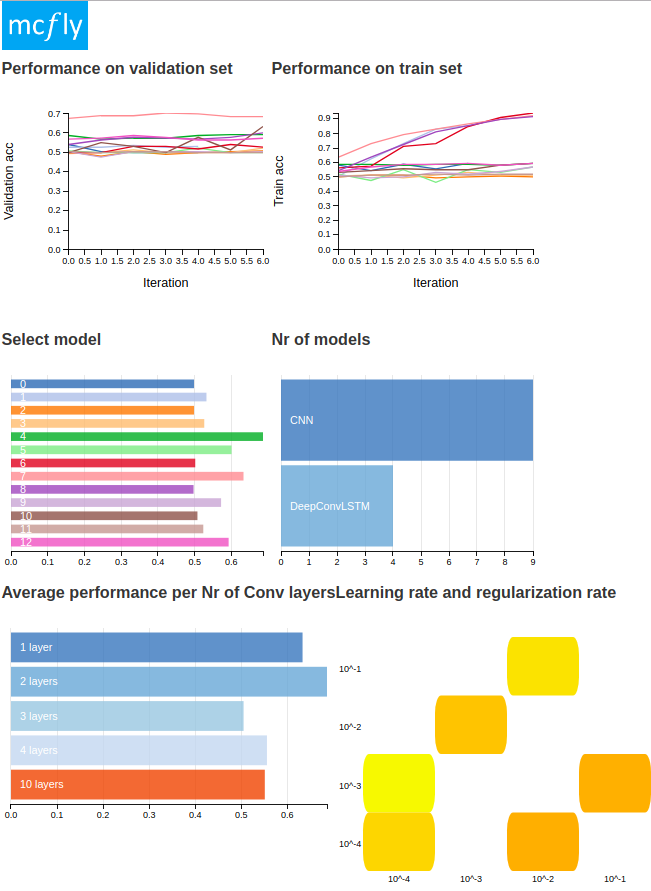

In [3]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(filename='/home/isa/Imágenes/Selección_058.png')

In [0]:
outputfile

## Resultados de los entrenamientos con ambos modelos


In [0]:
modelcomparisons = pd.DataFrame({'model':[str(params) for model, params, model_types in models],
                       'train_acc': [history.history['acc'][-1] for history in histories],
                       'train_loss': [history.history['loss'][-1] for history in histories],
                       'val_acc': [history.history['val_acc'][-1] for history in histories],
                       'val_loss': [history.history['val_loss'][-1] for history in histories]
                       })
modelcomparisons.to_csv(os.path.join(resultpath, 'modelcomparisons.csv'))

modelcomparisons

,model,train_acc,train_loss,val_acc,val_loss
0,"{'learning_rate': 0.08360289270402858, 'regula...",0.512450,0.996675,0.523557,1.023729
1,"{'learning_rate': 0.000893145093504032, 'regul...",0.591965,0.682005,0.592568,0.690743


## Elección del mejor modelo
Esta elección es en función del accuracy

In [0]:

best_model_index = np.argmax(val_accuracies)
best_model, best_params, best_model_types = models[best_model_index]
print('Model type and parameters of the best model:')
print(best_model_types)
print(best_params)



"\nbest_model_index = np.argmax(val_accuracies)\nbest_model, best_params, best_model_types = models[best_model_index]\nprint('Model type and parameters of the best model:')\nprint(best_model_types)\nprint(best_params)\n\n"

## ¿Afectará al resultado el número de muestras y las épocas?


Podemos ver que disminuye el accuracy al disminuir el número de épocas y de batch

In [0]:
#We make a copy of the model, to start training from fresh
nr_epochs = 1
datasize = 500 # Change in `X_train.shape[0]` if training complete data set
history = best_model.fit(X_train_2[:datasize,:,:], y_train_binary_2[:datasize,:],
              epochs=nr_epochs, validation_data=(X_val, y_val_binary))

Train on 500 samples, validate on 1507 samples
Epoch 1/1
500/500 [==============================] - 112s 224ms/step - loss: 0.6672 - acc: 0.6060 - val_loss: 0.6898 - val_acc: 0.5899


### Guardamos el mejor modelo

In [0]:

modelname = 'my_bestmodel.h5'
model_path = os.path.join(resultpath,modelname)
best_model.save(model_path)


'\nbest_model.save(model_path)\n'

In [0]:
model_reloaded = load_model(model_path)

**Comprobamos que al volver a cargar el mejor modelo no han cambiado los pesos**

In [0]:
np.all([np.all(x==y) for x,y in zip(best_model.get_weights(), model_reloaded.get_weights())])

True

## Aplicamos predicciones con el conjunto de validación y el mejor modelo

### Local

In [0]:

model = load_model('my_bestmodel.h5')

### Google Colaboratory

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/env_mcfly/my_bestmodel.h5')

## **PREDICT** sobre el conjunto de validación

Predict consiste en que dado un conjunto de datos devuelve las salidas de las predicciones de cada muestra

In [0]:
## Inspect model predictions on validation data
datasize = X_val.shape[0]
probs = model.predict_proba(X_val[:datasize,:,:],batch_size=1)

In [0]:
#columns are predicted, rows are truth
predicted = probs.argmax(axis=1)
y_index = y_val_binary.argmax(axis=1)
labels=y_train_binary_2[1]

confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [labels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [labels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in labels], fill_value=0)
confusion_matrix



,0.0,1.0
0.0,485,266
1.0,352,404


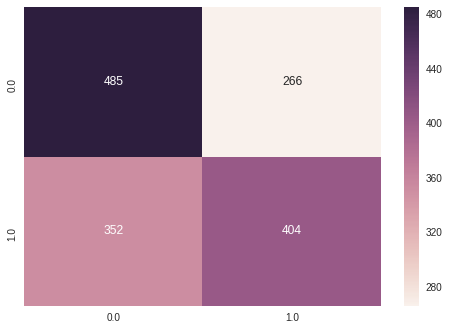

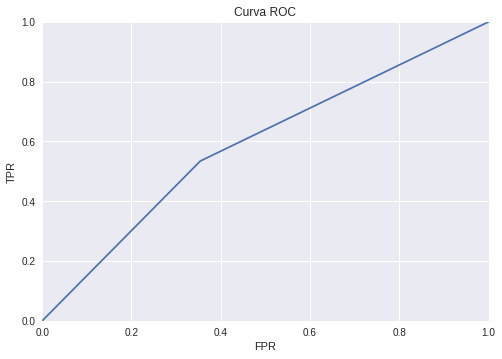

In [0]:
fprs,tprs,thresholds = metrics.roc_curve(pd.Series(y_index),pd.Series(predicted))

sns.heatmap(confusion_matrix,annot=True, fmt="d")
plt.show()

plt.plot(fprs, tprs)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Curva ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid(True)
plt.show()


**Accuracy de la predicción sobre validación**

Si calculamos el accuracy en este caso: 
![texto alternativo](https://cdn-images-1.medium.com/max/1600/1*5XuZ_86Rfce3qyLt7XMlhw.png)

accuracy= 58%

# Test sobre en conjunto de Test con evaluate

La función evaluate consiste en dados unos datos y una etiquetas calcula xómo de bien se le ajusta el modelo

In [0]:
## Test on Testset
loss, acc = model.evaluate(X_test, y_test_binary, verbose=True)

print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))



1883/1883 [==============================] - 60s 32ms/step

Testing loss: 0.6661958125634074, acc: 0.612320764483889



Como se puede observar el resultado se ajunta bastante al accuracy que se consiguió con el conjuno de validación con un 61%.